In [1]:
import pandas as pd

# Load the dataset
loan_data = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')

# Display the first few rows of the dataset and summary statistics to understand its structure
loan_data.head(), loan_data.describe(), loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


(   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
 0      8153374                         0           5221.545193   
 1      7442532                         5           1958.928726   
 2      2256073                         0           3363.009259   
 3      4885975                         0           4766.648001   
 4      4700614                         1           1345.827718   
 
    total_debt_outstanding       income  years_employed  fico_score  default  
 0             3915.471226  78039.38546               5         605        0  
 1             8228.752520  26648.43525               2         572        1  
 2             2027.830850  65866.71246               4         602        0  
 3             2501.730397  74356.88347               5         612        0  
 4             1768.826187  23448.32631               6         631        0  ,
         customer_id  credit_lines_outstanding  loan_amt_outstanding  \
 count  1.000000e+04              10000.000000   

##Data Overview
###Structure
The dataset contains 10,000 entries, with each row representing a loan borrower and the following columns:

1. customer_id: Unique identifier for each customer.
2. credit_lines_outstanding: Number of credit lines the borrower has, excluding the current loan.
3. loan_amt_outstanding: Current loan amount outstanding.
4. total_debt_outstanding: Total debt the borrower has, including current loan.
5. income: Annual income of the borrower.
6. years_employed: Number of years the borrower has been employed.
7. fico_score: FICO score of the borrower.
8. default: Indicator variable where 1 means the borrower has previously defaulted and 0 means they have not.
Statistics Summary
9. Credit Lines: On average, borrowers have about 1.46 credit lines.
10. Loan Amount: The mean loan amount outstanding is approximately 4,160 USD, with a maximum of 10,751 USD.
11. Income: The average income is around 70,040 USD, with a broad range (min: 1,000 USD; max: 148,412 USD).
12. FICO Score: The average FICO score is 638, ranging from 408 to 850.

## Feature Engineering
We can calculate ratios that might provide better insights into the borrower's financial health:

* Debt-to-Income Ratio (DTI): total_debt_outstanding / income
* Payment-to-Income Ratio (PTI): loan_amt_outstanding / income
These ratios can help quantify the borrower's debt burden relative to their income, which is crucial for predicting default risk.

In [2]:
# Add new features: Debt-to-Income Ratio (DTI) and Payment-to-Income Ratio (PTI)
loan_data['debt_to_income'] = loan_data['total_debt_outstanding'] / loan_data['income']
loan_data['payment_to_income'] = loan_data['loan_amt_outstanding'] / loan_data['income']

# Overview of the new features
loan_data[['debt_to_income', 'payment_to_income']].describe()

,debt_to_income,payment_to_income
count,10000.000000,10000.000000
mean,0.124018,0.059423
std,0.082802,0.010642
min,0.010000,0.012249
25%,0.068533,0.052125
50%,0.097434,0.059517
75%,0.163385,0.066717
max,0.404561,0.102103


## New Features Overview

1. **Debt-to-Income Ratio (DTI)**: This ratio measures the total debt of the borrower relative to their income.
 * **Mean**: 0.124, suggesting that on average, borrowers' debt is about 12.4% of their income.
 * **Range**: From a low of 1% to a high of 40.46%, indicating significant variation among borrowers.

2. **Payment-to-Income Ratio (PTI)**: This ratio reflects the portion of income that goes towards loan payments.
 * **Mean**: 0.059, meaning that on average, about 5.9% of income is allocated to loan payments.
 * **Range**: Between 1.2% and 10.2%, showing diverse financial commitments across the borrower pool.


## Exploratory Data Analysis
Next, we'll conduct EDA to:

* Visualise the distribution of these new features.
* Explore the relationship between these features and the default status.

This will help identify patterns and insights that can guide model building and feature selection.

### Visualisations
1. Histograms for DTI and PTI to understand their distributions.
2. Box plots to compare the distribution of these ratios for defaulters vs. non-defaulters.

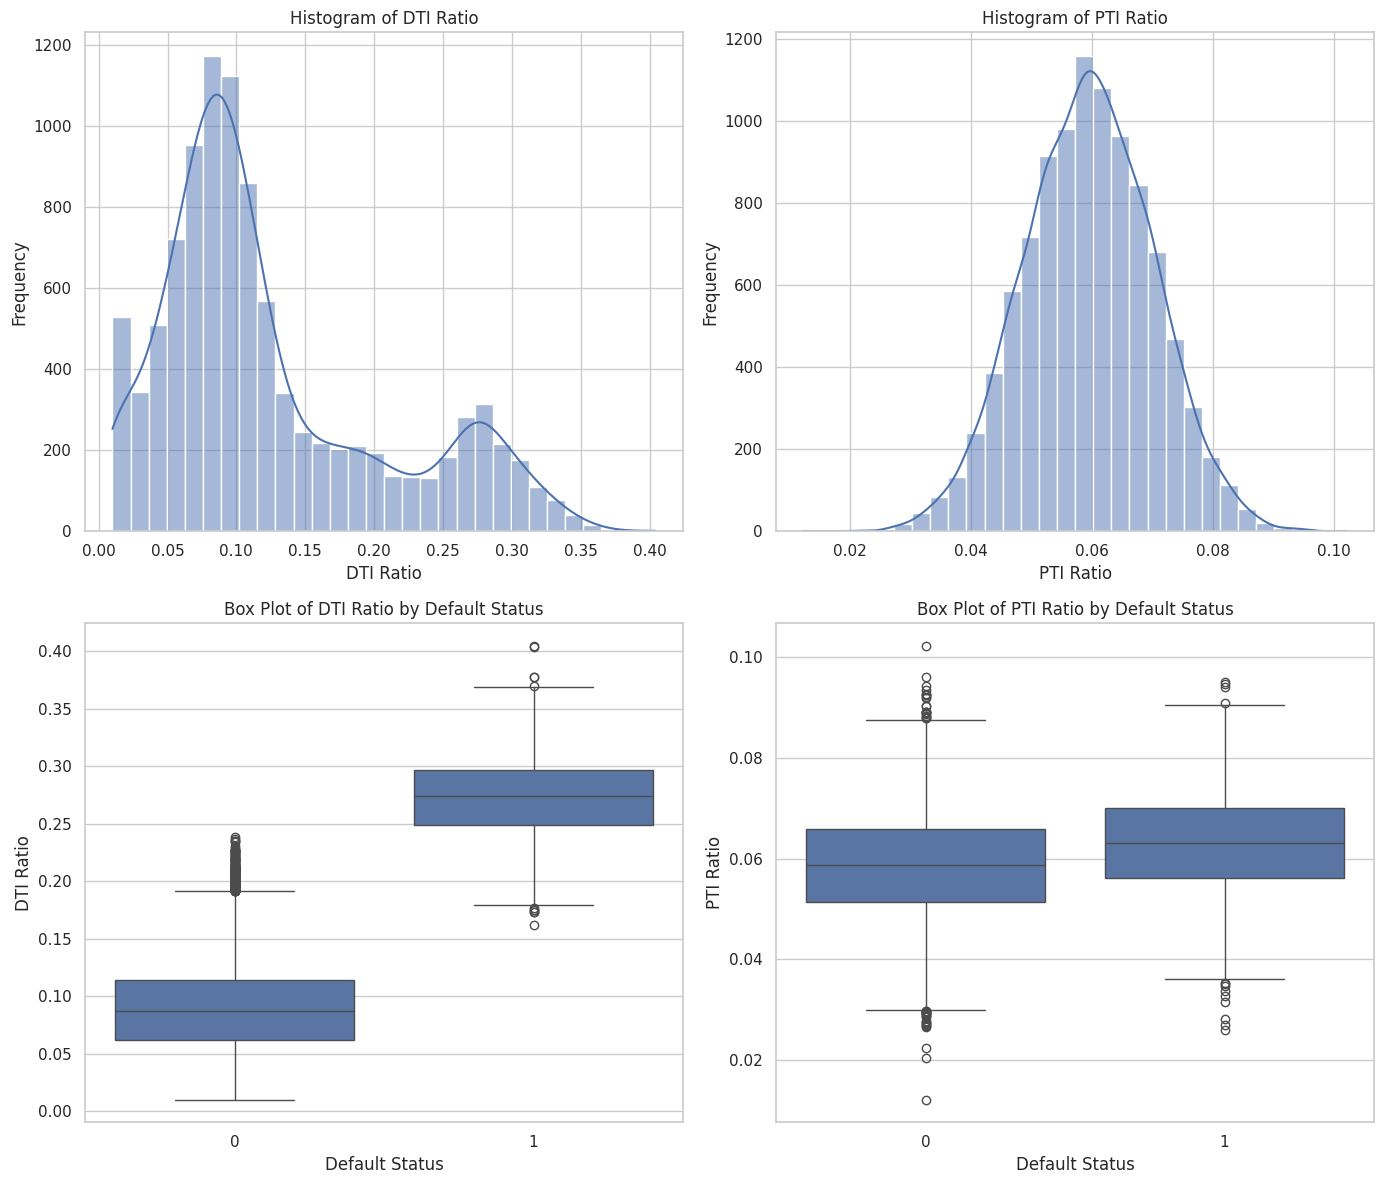

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthitics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the visualisations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Histogram of DTI Ratio
sns.histplot(loan_data['debt_to_income'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of DTI Ratio')
axes[0, 0].set_xlabel('DTI Ratio')
axes[0, 0].set_ylabel('Frequency')

# Histogram of PTI Ratio
sns.histplot(loan_data['payment_to_income'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of PTI Ratio')
axes[0, 1].set_xlabel('PTI Ratio')
axes[0, 1].set_ylabel('Frequency')

# Box plot of DTI Ratio by Default Status
sns.boxplot(x='default', y='debt_to_income', data=loan_data, ax=axes[1,0])
axes[1, 0].set_title('Box Plot of DTI Ratio by Default Status')
axes[1, 0].set_xlabel('Default Status')
axes[1, 0].set_ylabel('DTI Ratio')

# Box plot of DTI Ratio by Default Status
sns.boxplot(x='default', y='payment_to_income', data=loan_data, ax=axes[1,1])
axes[1, 1].set_title('Box Plot of PTI Ratio by Default Status')
axes[1, 1].set_xlabel('Default Status')
axes[1, 1].set_ylabel('PTI Ratio')

plt.tight_layout()
plt.show()

##Visual Analysis
###Distribution of Ratios
1. Debt-to-Income Ratio (DTI):
 * The histogram shows a skewed distribution, suggesting most borrowers have a lower DTI, with a tail extending towards higher ratios.
2. Payment-to-Income Ratio (PTI):
 * This distribution is also skewed but less pronounced than DTI, centering around the mean of 0.059, indicating most borrowers allocate a similar portion of their income to loan payments.

###Impact on Default Status
1. **DTI by Default Status**:
The box plot indicates that defaulters tend to have higher DTI ratios compared to non-defaulters, suggesting a possible correlation between higher debt burdens and increased likelihood of default.
2. **PTI by Default Status**:
Similar to DTI, defaulters generally have higher PTI ratios. This could mean that higher loan payments relative to income are a stress factor leading to defaults.

###Insights and Model Building
These visualizations provide insights into financial behaviors that could predict default:

* **Higher DTI and PTI** ratios appear to be associated with a higher probability of default.
* Both ratios will be valuable predictors in our model.

##Next Steps for Model Building
1. **Correlation Analysis**: Quickly examine the correlations between all features and the default status to confirm the visual insights and understand other potential predictors.
2. **Model Training**: Start with a logistic regression model using these features, evaluate its performance, and then consider more complex models based on initial results.

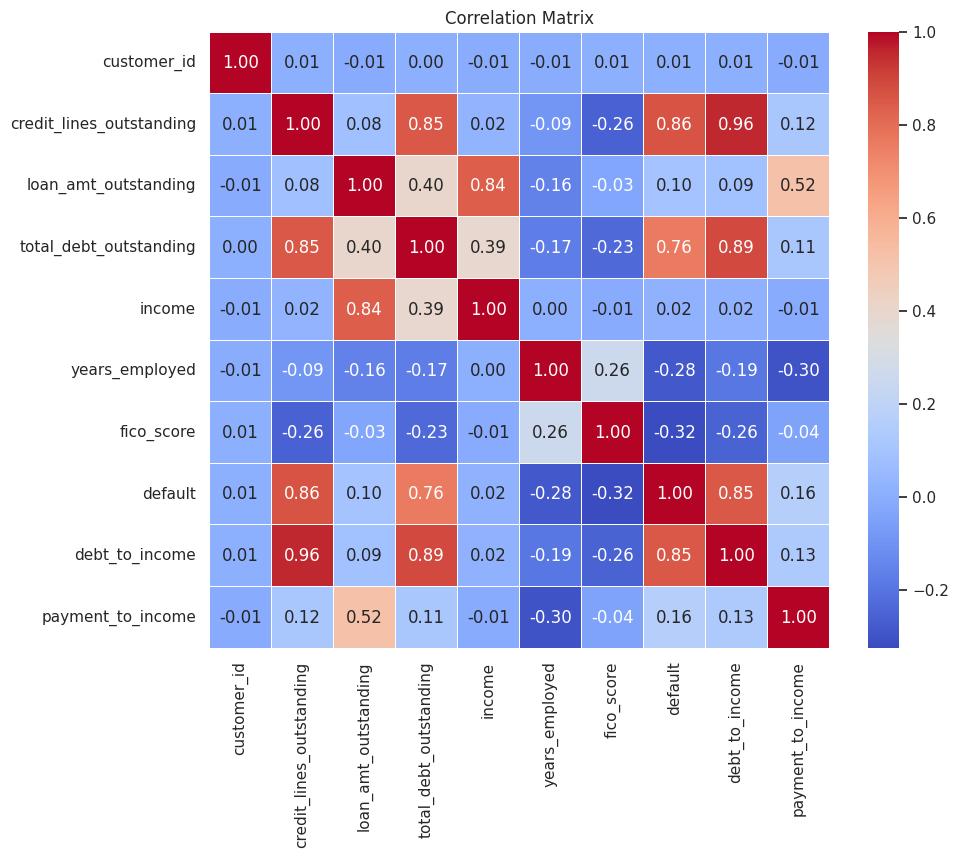

In [6]:
# Calculate and display the correlation matrix of the features including the target variable
correlation_matrix = loan_data.corr()

#Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##Model Training Strategy
Given these correlations, the following features are likely to be predictive and should be included in the initial model:
* Credit Lines Outstanding
* FICO Score
* Debt-to-Income Ratio
* Payment-to-Income Ratio
* Income
* Years Employed

###Next Steps
1. **Data Splitting**: Divide the dataset into training and validation sets.
2. **Model Building**: Train a logistic regression model with the selected features.
3. **Model Evaluation**: Assess the model's performance using appropriate metrics.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income',
            'fico_score', 'total_debt_outstanding', 'years_employed']
target = 'default'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(loan_data[features], loan_data[target], test_size=0.2, random_state=42)

# Training the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

#Predicting on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy, roc_auc, report, cm


(0.99,
 0.9995373076173778,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1652\n           1       0.98      0.96      0.97       348\n\n    accuracy                           0.99      2000\n   macro avg       0.99      0.98      0.98      2000\nweighted avg       0.99      0.99      0.99      2000\n',
 array([[1645,    7],
        [  13,  335]]))

##Model Performance Evaluation
The logistic regression model has shown excellent performance on the test data with the following metrics:
* **Accuracy**: 99%, indicating that the model correctly predicts default status for 99% of the cases in the test set.
* **ROC-AUC Score**: 0.9995, suggesting that the model has a near-perfect ability to distinguish between defaulters and non-defaulters.

###Classification Report
* **Precision** for non-defaulters (0) is 99% and for defaulters (1) is 98%, showing high reliability in predicting both classes.
* **Recall** for non-defaulters is 100%, and for defaulters, it is 96%, which means it almost correctly identifies all non-defaulters and most defaulters.
* **F1-Score** reflects the balanced accuracy of the model for both classes: 99% for non-defaulters and 97% for defaulters.

###Confusion Matrix
* True Non-Defaulters (TN): 1645
* False Defaulters (FP): 7
* False Non-Defaulters (FN): 13
* True Defaulters (TP): 335

This indicates that the model only made 7 + 13 = 20 mistakes out of 2000 predictions, which is outstanding.